In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pywt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import pandas as pd
from measure import compute_psnr, compute_ssim
from utils import add_noisy, transform_wavelet

In [2]:
_IMG_PATH = '../images/lena512.bmp'

In [3]:
img = cv2.imread(_IMG_PATH)
# img.shape

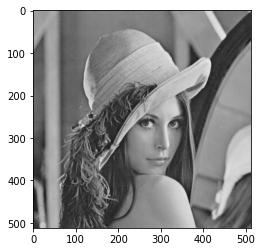

In [4]:
plt.imshow(img)

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
# plt.imshow(img_gray)

In [33]:
img_noise, noise = add_noisy(img_gray, var=25**2)
# plt.imshow(img_noise)

In [34]:
y_coeffs = transform_wavelet(img_noise)
x_coeffs = transform_wavelet(img_gray)
v_coeffs = transform_wavelet(noise)

In [35]:
var_noise_est = np.median(np.abs(y_coeffs[-1][-1]))/0.6745
var_noise_est

25.070925027006602

In [48]:
# plt.figure(figsize=(10, 8), dpi=80)

# plt.subplot(2, 2, 1)
# plt.imshow(x_coeffs[0],cmap='gray')
# plt.title("LL")
# plt.axis('off')

# plt.subplot(2, 2, 2)
# plt.imshow(x_coeffs[1][0],cmap='gray')
# plt.title("HL")
# plt.axis('off')

# plt.subplot(2, 2, 3)
# plt.imshow(x_coeffs[1][1],cmap='gray')
# plt.title("LH")
# plt.axis('off')

# plt.subplot(2, 2, 4)
# plt.imshow(x_coeffs[1][2],cmap='gray')
# plt.title("HH")
# plt.axis('off')

# plt.savefig('../outputs/wavelet_coef.png')


In [47]:
# plt.figure(figsize=(10, 8), dpi=80)

# fig = sns.distplot(y_coeffs[1][2].flatten(), hist=True, kde=True, 
#              bins=int(180/5), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 1}).get_figure()

# fig.savefig('../outputs/dist_hh.png')

In [67]:
threshold = var_noise_est*np.sqrt(2*np.log(img_noise.size))
ll, (hl, lh, hh) = y_coeffs
hl_thres = pywt.threshold(hl, threshold, mode='soft')
lh_thres = pywt.threshold(lh, threshold, mode='soft')
hh_thres = pywt.threshold(hh, threshold, mode='soft')
coef_thres = ll, (hl_thres, lh_thres, hh_thres)
img_denoise = pywt.waverec2(coef_thres, 'db2')

In [69]:
compute_psnr(img_gray, img_noise),compute_psnr(img_gray, img_denoise)

(20.157354280255227, 25.509821650819728)

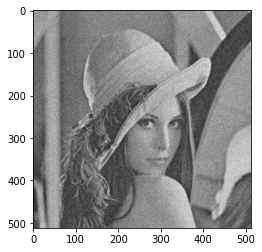

In [70]:
plt.imshow(img_denoise, cmap='gray')